In [45]:
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyro
import pyro.distributions as dist
from gpytorch.kernels import ScaleKernel, RBFKernel, PeriodicKernel, \
    LinearKernel, ProductKernel, MaternKernel

import tqdm

In [46]:
# change default font
plt.rcParams["font.family"] = "sans-serif"
mpl.rcParams.update({'figure.facecolor': 'white'})

Text(0.5, 1.0, 'Random variable')

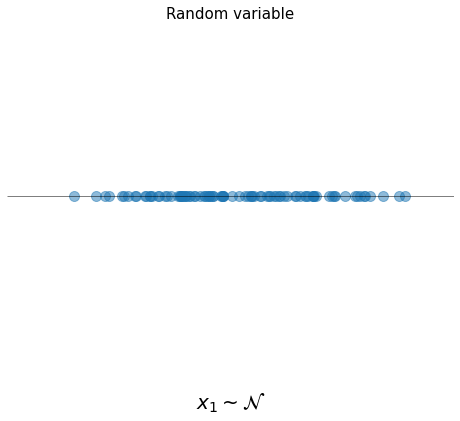

In [3]:
rng = np.random.default_rng(88)
rand_var = rng.normal(0, 1, 90)

fig, ax = plt.subplots(figsize=(8,6))
# ax.figure
ax.scatter(rand_var, np.zeros_like(rand_var), s=100, alpha=.5)
ax.hlines(0, xmin=-2.5, xmax=2.5, colors='black', lw=.5)
ax.set_xlim([-2.5, 2.5])
# # plt.ylim(-.1, .1)
# ax.set_xticks([-2, 0, 2])
# ax.set_xlabel(r'$x_1$', fontdict={'fontsize':15}, labelpad=5)
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
# # Add annotation
annotation_text = r'$x_1 \sim \mathcal{N}$'
ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')

# Create line
# ax.hlines(y=0.0, xmin=0, xmax=1)
# ax.set_yticks([0,100])
# ax.set_yticks([])
ax.set_title("Random variable", fontdict={'fontsize':15}, pad=15)
# plt.title('Plot with default font')

Text(0.5, 1.0, 'Random vector')

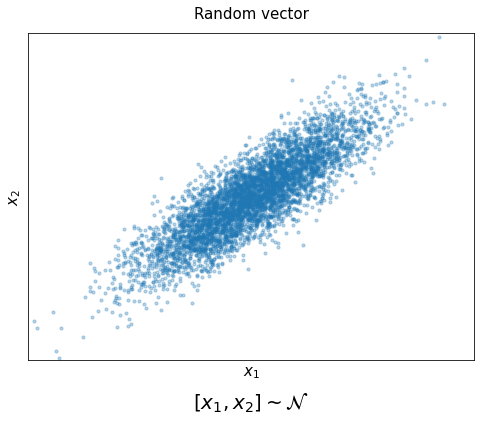

In [4]:
rng = np.random.default_rng(88)
rand_vec = rng.multivariate_normal([0,0], [[1,.85],[.85,1]], size=5000)

fig, ax = plt.subplots(figsize=(8,6))
# ax.figure
ax.scatter(rand_vec[:,0], rand_vec[:,1], s=10, alpha=.3, marker='o')
# ax.hlines(0, xmin=-2.5, xmax=2.5, colors='black', lw=.5)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
# # # plt.ylim(-.1, .1)
# ax.set_xticks([-2, 0, 2])
# ax.set_yticks([-2, 0, 2])
ax.set_xlabel(r'$x_1$', fontdict={'fontsize':15}, labelpad=5)
ax.set_ylabel(r'$x_2$', fontdict={'fontsize':15}, labelpad=5)
ax.set_yticks([])
ax.set_xticks([])
# ax.set_yticks([])
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
# # Add annotation
annotation_text = r'$[x_1, x_2] \sim \mathcal{N}$'
ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')

ax.set_title("Random vector", fontdict={'fontsize':15}, pad=15)

In [47]:
class ExactGP(gpytorch.models.ExactGP):
            
    def __init__(self, train_x, train_y, likelihood, kernel):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = kernel
                
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Set inputs
N = 1000
draws = 20
train_x = torch.empty(N)
random_func = torch.empty((N,draws))
train_x = torch.linspace(0, 1, N)

# initialise the model
kernel = ScaleKernel(RBFKernel())
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGP(train_x=train_x, train_y=random_func, likelihood=likelihood, kernel=kernel)


# Set hyperparameters
hypers = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.33),
    }
]
model.initialize(**hypers[0])

model.eval()
torch.manual_seed(2)
with gpytorch.settings.prior_mode(True):
    for draw in range(draws):
        random_func[:,draw] = model(train_x).sample()

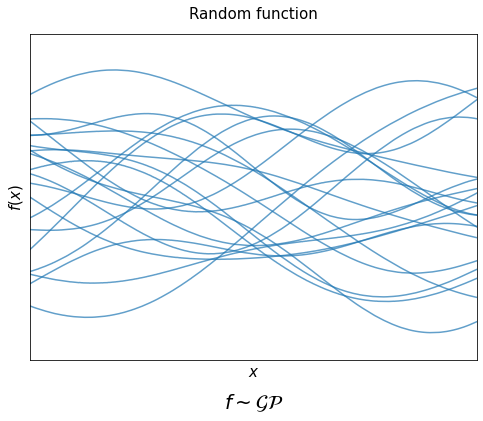

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
for draw in range(draws):
    ax.plot(train_x, random_func[:,draw], c='#1f77b4', alpha=.7)

ax.set_xlim(0,1)
ax.set_ylim(-2,2)
# ax.set_yticks([-1, 0, 1])
# ax.set_xticks([0, .5, 1.])
ax.set_xlabel(r'$x$', fontdict={'fontsize':15}, labelpad=5)
ax.set_ylabel(r'$f(x)$', fontdict={'fontsize':15}, labelpad=5)
ax.set_yticks([])
ax.set_xticks([])
annotation_text = r'$f \sim \mathcal{GP}$'
ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
ax.set_title("Random function", fontdict={'fontsize':15}, pad=15);

In [7]:
fig, ax = plt.subplots(ncols=3, figsize=(30,6), dpi=800)
title_fs = 25
axis_fs = 22
annotate_fs = 25
title_pad = 15
ann_y_adjust = -.18

rng = np.random.default_rng(88)
rand_var = rng.normal(0, 1, 90)

ax[0].scatter(rand_var, np.zeros_like(rand_var), s=100, alpha=.5)
ax[0].hlines(0, xmin=-2.5, xmax=2.5, colors='black', lw=.5)
ax[0].set_xlim([-2.5, 2.5])
# # plt.ylim(-.1, .1)
# ax.set_xticks([-2, 0, 2])
# ax.set_xlabel(r'$x_1$', fontdict={'fontsize':15}, labelpad=5)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
# # Add annotation
annotation_text = r'$x_1 \sim \mathcal{N}$'
ax[0].annotate(annotation_text, xy=(.5, ann_y_adjust), xycoords='axes fraction', fontsize=annotate_fs, ha='center')

# Create line
# ax.hlines(y=0.0, xmin=0, xmax=1)
# ax.set_yticks([0,100])
# ax.set_yticks([])
ax[0].set_title("Random variable", fontdict={'fontsize':title_fs}, pad=title_pad)
# plt.title('Plot with default font')


rng = np.random.default_rng(88)
rand_vec = rng.multivariate_normal([0,0], [[1,.85],[.85,1]], size=5000)

ax[1].scatter(rand_vec[:,0], rand_vec[:,1], s=10, alpha=.3, marker='o')
# ax.hlines(0, xmin=-2.5, xmax=2.5, colors='black', lw=.5)
ax[1].set_xlim([-4, 4])
ax[1].set_ylim([-4, 4])
# # # plt.ylim(-.1, .1)
# ax.set_xticks([-2, 0, 2])
# ax.set_yticks([-2, 0, 2])
ax[1].set_xlabel(r'$x_1$', fontdict={'fontsize':axis_fs}, labelpad=5)
ax[1].set_ylabel(r'$x_2$', fontdict={'fontsize':axis_fs}, labelpad=5)
ax[1].set_yticks([])
ax[1].set_xticks([])
# ax.set_yticks([])
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
# # Add annotation
annotation_text = r'$[x_1, x_2] \sim \mathcal{N}$'
ax[1].annotate(annotation_text, xy=(.5, ann_y_adjust), xycoords='axes fraction', fontsize=annotate_fs, ha='center')
ax[1].set_title("Random vector", fontdict={'fontsize':title_fs}, pad=title_pad)


for draw in range(draws):
    ax[2].plot(train_x, random_func[:,draw], c='#1f77b4', alpha=.7)

ax[2].set_xlim(0,1)
ax[2].set_ylim(-2,2)
# ax.set_yticks([-1, 0, 1])
# ax.set_xticks([0, .5, 1.])
ax[2].set_xlabel(r'$x$', fontdict={'fontsize':axis_fs}, labelpad=5)
ax[2].set_ylabel(r'$f(x)$', fontdict={'fontsize':axis_fs}, labelpad=5)
ax[2].set_yticks([])
ax[2].set_xticks([])
annotation_text = r'$f \sim \mathcal{GP}$'
ax[2].annotate(annotation_text, xy=(.5, ann_y_adjust), xycoords='axes fraction', fontsize=annotate_fs, ha='center')
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
ax[2].set_title("Random function", fontdict={'fontsize':title_fs}, pad=title_pad);

# Reduce the spacing between the subplots
plt.subplots_adjust(wspace=.15)

Short length scale

In [108]:
def plot_random_gp(kernel, hyperparam, title, seed=5, draws=20, colour='#1f77b4'):

    # Set inputs
    N = 1000
    train_x = torch.empty(N)
    random_func = torch.empty((N,draws))
    train_x = torch.linspace(0, 1, N)

    # initialise the model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGP(train_x=train_x, train_y=random_func, likelihood=likelihood, kernel=kernel)

    # init hyperparameters
    model.initialize(**hyperparam[0])

    model.eval()
    torch.manual_seed(seed)
    with gpytorch.settings.prior_mode(True):
        for draw in range(draws):
            random_func[:,draw] = model(train_x).sample()

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(train_x, random_func[:,0], c=colour, alpha=1)
    for draw in range(1,draws):
        ax.plot(train_x, random_func[:,draw], c=colour, alpha=.15)

    ax.set_xlim(0,1)
    ax.set_ylim(-2,2)
    # ax.set_yticks([-1, 0, 1])
    # ax.set_xticks([0, .5, 1.])
    ax.set_xlabel(r'$x$', fontdict={'fontsize':15}, labelpad=5)
    ax.set_ylabel(r'$f(x)$', fontdict={'fontsize':15}, labelpad=5)
    ax.set_yticks([])
    ax.set_xticks([])
    annotation_text = r'$f \sim \mathcal{GP}$'
    ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')
    # ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    # plt.axis('off')
    ax.set_title(title, fontdict={'fontsize':15}, pad=15);

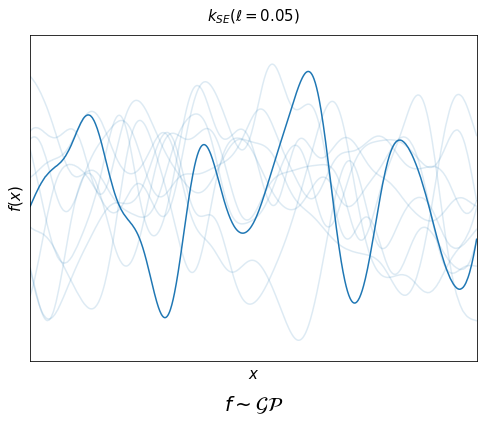

In [60]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.05),
    }
]
kernel = ScaleKernel(RBFKernel())
title = r"$k_{SE}(\ell=0.05)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=10)

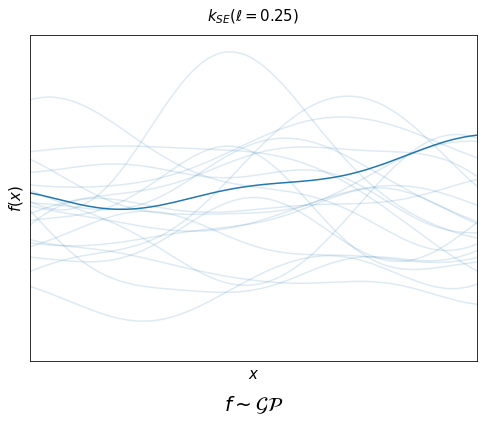

In [61]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.25),
    }
]
kernel = ScaleKernel(RBFKernel())
title = r"$k_{SE}(\ell=0.25)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=20)

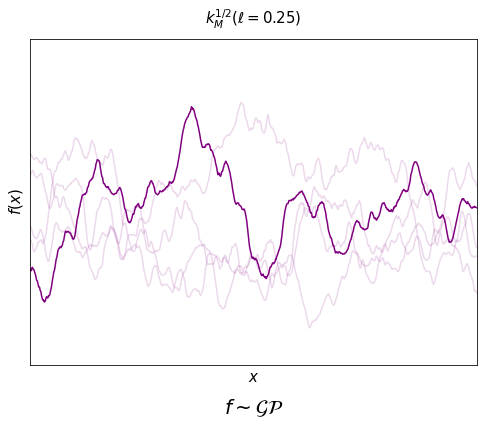

In [110]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.25),
    }
]
kernel = ScaleKernel(MaternKernel(nu=1/2))
title = r"$k_{M}^{1/2}(\ell=0.25)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=5, colour='purple')

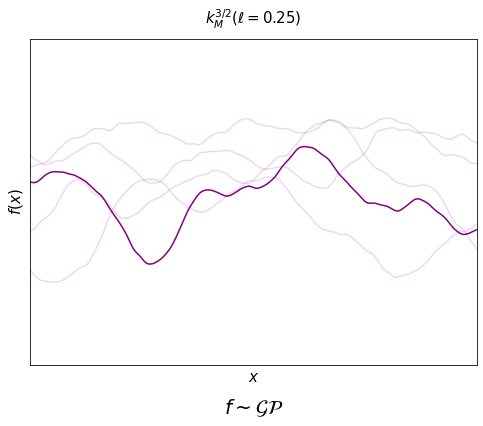

In [111]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.25),
    }
]
kernel = ScaleKernel(MaternKernel(nu=3/2))
title = r"$k_{M}^{3/2}(\ell=0.25)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=5, colour='purple')

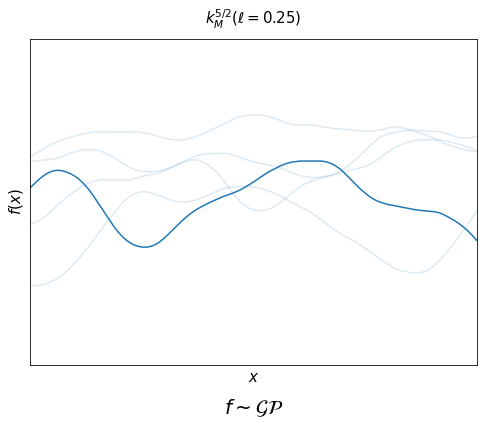

In [76]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.25),
    }
]
kernel = ScaleKernel(MaternKernel(nu=5/2))
title = r"$k_{M}^{5/2}(\ell=0.25)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=5)

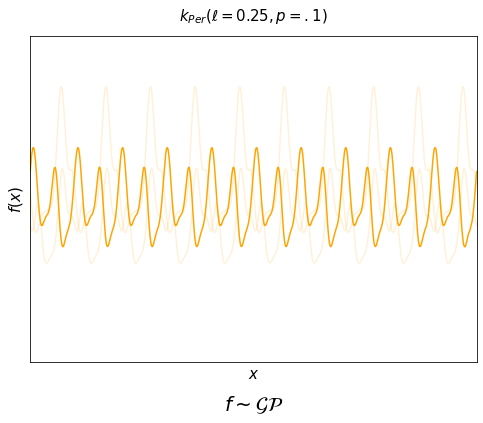

In [112]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.9),
        'covar_module.base_kernel.period_length': torch.tensor(.1)
    }
]
kernel = ScaleKernel(PeriodicKernel())
title = r"$k_{Per}(\ell=0.25, p=.1)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=3, seed=5, colour='orange')

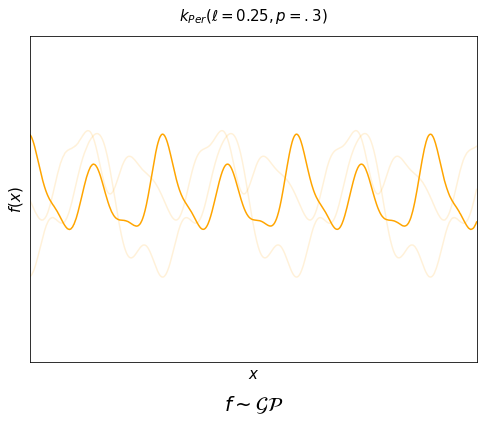

In [113]:
hyperparam = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.9),
        'covar_module.base_kernel.period_length': torch.tensor(.3)
    }
]
kernel = ScaleKernel(PeriodicKernel())
title = r"$k_{Per}(\ell=0.25, p=.3)$"
plot_random_gp(kernel, hyperparam=hyperparam,title=title,draws=3, seed=5, colour='orange')

In [32]:
class ExactGP(gpytorch.models.ExactGP):
            
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
            # gpytorch.kernels.RBFKernel() # default ard_num_dims=None. All dims have same length scale
        )
                
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Set inputs
N = 1000
draws = 10
train_x = torch.empty(N)
random_func = torch.empty((N,draws))
train_x = torch.linspace(0, 1, N)

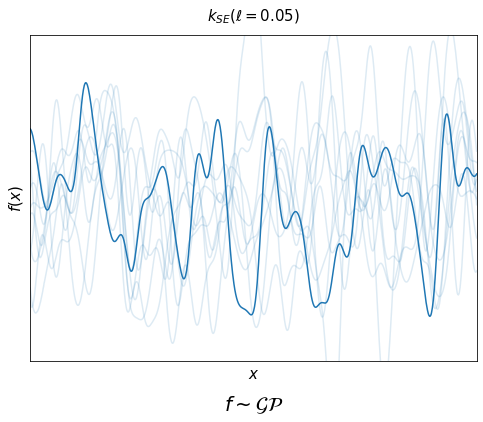

In [37]:
# initialise the model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGP(train_x=train_x, train_y=random_func, likelihood=likelihood)

# Set hyperparameters
hypers = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.02),
    }
]
model.initialize(**hypers[0])

model.eval()
torch.manual_seed(3)
with gpytorch.settings.prior_mode(True):
    for draw in range(draws):
        random_func[:,draw] = model(train_x).sample()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(train_x, random_func[:,0], c='#1f77b4', alpha=1)
for draw in range(1,draws):
    ax.plot(train_x, random_func[:,draw], c='#1f77b4', alpha=.15)

ax.set_xlim(0,1)
ax.set_ylim(-2,2)
# ax.set_yticks([-1, 0, 1])
# ax.set_xticks([0, .5, 1.])
ax.set_xlabel(r'$x$', fontdict={'fontsize':15}, labelpad=5)
ax.set_ylabel(r'$f(x)$', fontdict={'fontsize':15}, labelpad=5)
ax.set_yticks([])
ax.set_xticks([])
annotation_text = r'$f \sim \mathcal{GP}$'
ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
ax.set_title(r"$k_{SE}(\ell=0.05)$", fontdict={'fontsize':15}, pad=15);

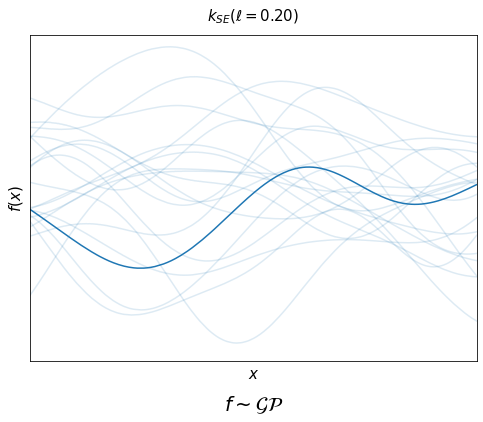

In [44]:
# Set inputs
N = 1000
draws = 20
train_x = torch.empty(N)
random_func = torch.empty((N,draws))
train_x = torch.linspace(0, 1, N)

# initialise the model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGP(train_x=train_x, train_y=random_func, likelihood=likelihood)

# Set hyperparameters
hypers = [
    {
        # 'likelihood.noise_covar.noise': torch.tensor(1),
        'covar_module.outputscale': torch.tensor(.5),
        'covar_module.base_kernel.lengthscale': torch.tensor(.2),
    }
]
model.initialize(**hypers[0])

model.eval()
torch.manual_seed(5)
with gpytorch.settings.prior_mode(True):
    for draw in range(draws):
        random_func[:,draw] = model(train_x).sample()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(train_x, random_func[:,0], c='#1f77b4', alpha=1)
for draw in range(1,draws):
    ax.plot(train_x, random_func[:,draw], c='#1f77b4', alpha=.15)

ax.set_xlim(0,1)
ax.set_ylim(-2,2)
# ax.set_yticks([-1, 0, 1])
# ax.set_xticks([0, .5, 1.])
ax.set_xlabel(r'$x$', fontdict={'fontsize':15}, labelpad=5)
ax.set_ylabel(r'$f(x)$', fontdict={'fontsize':15}, labelpad=5)
ax.set_yticks([])
ax.set_xticks([])
annotation_text = r'$f \sim \mathcal{GP}$'
ax.annotate(annotation_text, xy=(.5, -.15), xycoords='axes fraction', fontsize=20, ha='center')
# ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
# plt.axis('off')
ax.set_title(r"$k_{SE}(\ell=0.20)$", fontdict={'fontsize':15}, pad=15);